<h1> Lecture 23 

Data Science 8, Summer 2021 </h1>

<h3>
<b>
<ul>
<li>Measures of Spread</li><br>
    <ul> 
        <li>Variance</li><br>
        <li>Standard Deviation</li><br>
        <li>Chebyshev's Inequality</li><br>
        <li>Standard Units</li><br>
    </ul>
    <li>The Normal Distribution</li>
</ul>
</b>
</h3>

In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

#The following allows porting images into a Markdown window
#Syntax: ![title](image_name.png)
from IPython.display import Image

<h3>Measures of Spread: Variance and Standard Deviation </h3>

In [2]:
values = make_array(2, 3, 3, 9)
values

array([2, 3, 3, 9])

In [3]:
sd_table = Table().with_columns('Value', values)
sd_table

Value
2
3
3
9


In [4]:
average_value = np.average(sd_table.column(0))
average_value

4.25

In [5]:
deviations = values - average_value
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

Value,Deviation
2,-2.25
3,-1.25
3,-1.25
9,4.75


Let's square the deviations:

In [6]:
sd_table = sd_table.with_columns('Squared Deviation', 
                                 deviations ** 2)
sd_table

Value,Deviation,Squared Deviation
2,-2.25,5.0625
3,-1.25,1.5625
3,-1.25,1.5625
9,4.75,22.5625


In [7]:
# Variance of the data

variance = np.mean(sd_table.column('Squared Deviation'))
variance

7.6875

In [8]:
# Standard Deviation (SD) is the square root of the variance

sd = variance ** 0.5
sd

2.7726341266023544

One-Stop Tool for Standard Deviation: NumPy Function np.std

In [9]:
np.std(values)

2.7726341266023544

<h4>Units of Standard Deviation: Same as the units of the underlying data.</h4>

## Standard Units ##

In [10]:
births = Table.read_table('baby.csv')

In [11]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x)) / np.std(x)

In [12]:
ages = births.column('Maternal Age')

In [13]:
ages_standard_units = standard_units(ages)
ages_standard_units

array([-0.03925456,  0.99249577,  0.13270383, ...,  0.47662061,
       -1.07100488,  1.85228771])

In [14]:
print('Mean Ages in Standard Units:', np.mean(ages_standard_units))
print('SD of Ages in Standard Units:', np.std(ages_standard_units)
, )

Mean Ages in Standard Units: -7.868020072300939e-17
SD of Ages in Standard Units: 1.0


<h3>Converting to Standard Units is also called "Normalizing" Random Data (Variables): Convert to Zero-Mean, Unit-Variance Data.</h3>

## Standard Units

In [15]:
scores = Table.read_table('scores.csv')
scores.show(5)

Quiz 1,Quiz 2
9,9
9,8
8,7
9,9
7,7


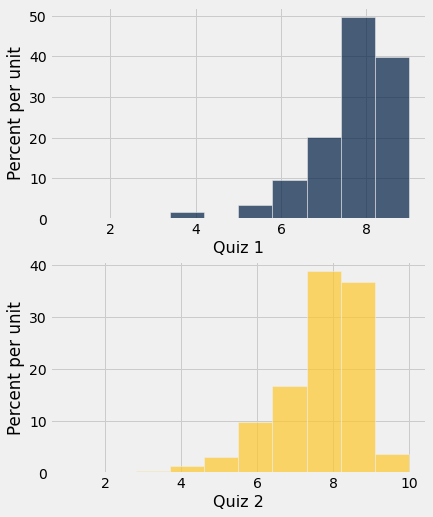

In [16]:
scores.hist(overlay=False)

Quiz 1 Average

In [17]:
np.mean(scores.column('Quiz 1'))

7.837359098228664

Quiz 1 Std Dev

In [18]:
np.std(scores.column('Quiz 1'))

1.1806090767665096

Quiz 2 Average

In [19]:
np.mean(scores.column('Quiz 2'))

7.900966183574879

Quiz 2 Std Dev

In [20]:
np.std(scores.column('Quiz 2'))

1.2635159264690692

<h4>Define a function that converts values in an array to standard units</h4>

In [21]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.average(x)) / np.std(x)

In [22]:
quiz1_su = standard_units(scores.column('Quiz 1'))
scores = scores.with_column('Quiz 1 in Standard Units', quiz1_su)

quiz2_su = standard_units(scores.column('Quiz 2'))
scores = scores.with_column('Quiz 2 in Standard Units', quiz2_su)

scores.show(10)

Quiz 1,Quiz 2,Quiz 1 in Standard Units,Quiz 2 in Standard Units
9,9,0.984781,0.869822
9,8,0.984781,0.0783796
8,7,0.13776,-0.713063
9,9,0.984781,0.869822
7,7,-0.70926,-0.713063
7,6,-0.70926,-1.50451
8,9,0.13776,0.869822
8,9,0.13776,0.869822
9,9,0.984781,0.869822
8,7,0.13776,-0.713063


<h3>Now let's look at the histograms of the standard units</h3>

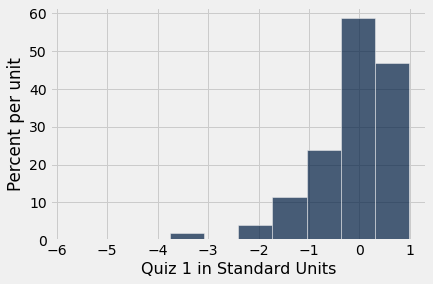

In [23]:
scores.hist('Quiz 1 in Standard Units', bins=10)

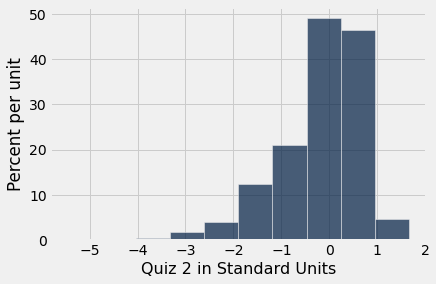

In [24]:
scores.hist('Quiz 2 in Standard Units', bins=10)

<h3>Discussion Question<h3>

In [25]:
ages = births.column('Maternal Age')
ages_standard_units = standard_units(ages)

In [26]:
both = Table().with_columns(
    'Age in Years', ages,
    'Age in Standard Units', ages_standard_units
)
both

Age in Years,Age in Standard Units
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


In [27]:
np.mean(ages), np.std(ages)

(27.228279386712096, 5.815360404190897)

<h4>Accordingly,</h4>

In [28]:
np.mean(ages) + both.column('Age in Standard Units').item(1) * np.std(ages)

33.0

## Chebyshev's Bound

In [29]:
births = Table.read_table('baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


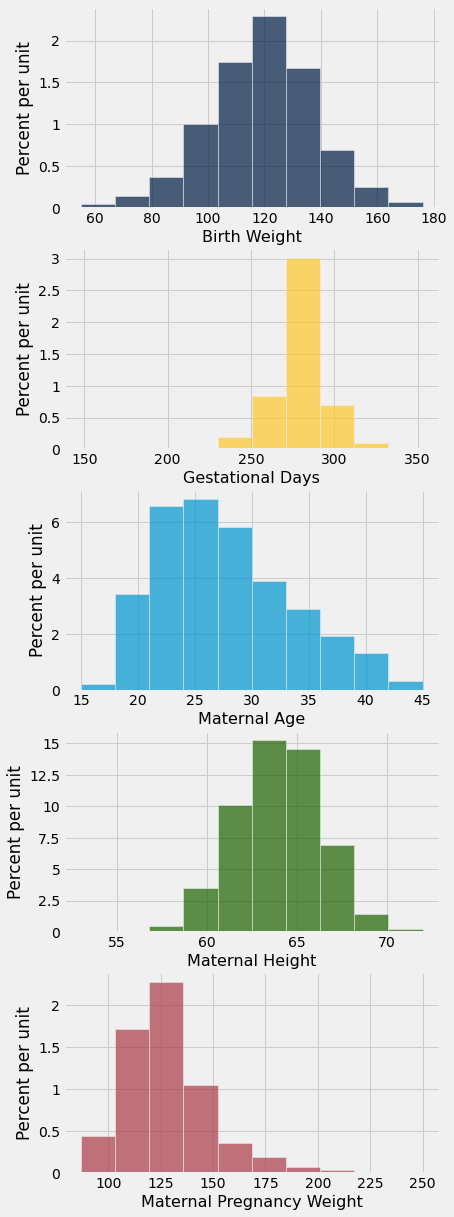

In [30]:
births.drop('Maternal Smoker').hist(overlay = False)

<h4>Let's take a closer look at the Maternal Pregnancy Weights</h4>

In [31]:
mpw = births.column('Maternal Pregnancy Weight')
mean = np.mean(mpw)
sd = np.std(mpw)
median_percentile_50=percentile(50,mpw)
print('Median MPW:', median_percentile_50)
print('Mean MPW:', np.round(mean,2))
print('MPW Standard Deviation:', np.round(sd,2))

Median MPW: 125
Mean MPW: 128.48
MPW Standard Deviation: 20.73


<h4>Let's consider data within $\pm 3$ SDs:</h4>

In [32]:
within_3_SDs = births.where(
    'Maternal Pregnancy Weight', 
    are.between(mean - 3*sd, mean + 3*sd))

<h4>What fraction of the total cases are within that range?</h4>

In [33]:
# Proportion within 3 SDs of the mean

within_3_SDs.num_rows / births.num_rows

0.9863713798977853

<h4>What does Chebyshev say?</h4>

In [34]:
# Chebyshev's bound: 
# The proportion we calculated above should be at least

1 - 1/(3**2)

0.8888888888888888

In [35]:
births.labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight',
 'Maternal Smoker')

In [36]:
# See if Chebyshev's bounds work for distributions with various shapes

for feature in births.labels:
    values = births.column(feature)
    mean = np.mean(values)
    sd = np.std(values)
    print()
    print(feature)
    for z in make_array(2, 3, 4, 5):
        chosen = births.where(feature, are.between(mean - z*sd, mean + z*sd))
        proportion = chosen.num_rows / births.num_rows
        percent = round(proportion * 100, 2)
        print('Average plus or minus', z, 'SDs:', percent, '% of the data')


Birth Weight
Average plus or minus 2 SDs: 94.89 % of the data
Average plus or minus 3 SDs: 99.57 % of the data
Average plus or minus 4 SDs: 100.0 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Gestational Days
Average plus or minus 2 SDs: 93.78 % of the data
Average plus or minus 3 SDs: 98.64 % of the data
Average plus or minus 4 SDs: 99.57 % of the data
Average plus or minus 5 SDs: 99.83 % of the data

Maternal Age
Average plus or minus 2 SDs: 94.89 % of the data
Average plus or minus 3 SDs: 99.91 % of the data
Average plus or minus 4 SDs: 100.0 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Maternal Height
Average plus or minus 2 SDs: 97.19 % of the data
Average plus or minus 3 SDs: 99.66 % of the data
Average plus or minus 4 SDs: 99.91 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Maternal Pregnancy Weight
Average plus or minus 2 SDs: 95.06 % of the data
Average plus or minus 3 SDs: 98.64 % of the data
Average plus or minus 4 SDs:

<h3> The SD and Bell Shaped Curves</h3>

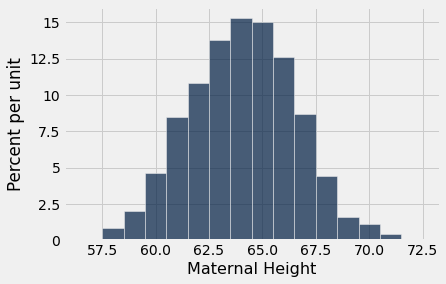

In [37]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))

In [38]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

(64.04940374787053, 2.5250254409674375)

In [39]:
np.mean(heights) - np.std(heights)

61.52437830690309

In [40]:
np.mean(heights) + np.std(heights)

66.57442918883797

<h2> Central Limit Theorem </h2>

In [41]:
united = Table.read_table('united.csv')
united_bins = np.arange(-20, 301, 10)
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


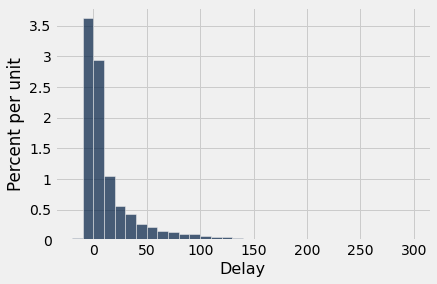

In [42]:
united.hist('Delay', bins=united_bins)

<h4>Compute the Median, Mean, and Standard Deviation of the Delays</h4>

In [43]:
delays = united.column('Delay')
delay_median = percentile(50, delays)
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
print('Median Delay:', np.round(delay_median,2))
print('Mean Delay:', np.round(delay_mean,2))
print('Delay Standard Deviation:', np.round(delay_sd,2))

Median Delay: 2
Mean Delay: 16.66
Delay Standard Deviation: 39.48


<h4><u>Question:</u> Why is the Mean greater than the Median? </h4>

<h4>Assume we can only sample the data&mdash;that is, we don't have practical access to the complete data.</h4>

In [44]:
def one_sample_mean(sample_size):
    """ 
    Takes a sample from the population of flights 
    and computes its mean
    """
    # Recall that the "sample" method without an 
    # argument performs the sampling with replacement
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

<h4>Run the function <tt>one_sample_mean</tt> several times:</h4>

In [45]:
one_sample_mean(100)

16.27

<h4>To understand the variability of the Sample Mean, run a large number of trials&mdash;that is, take a large number of samples:</h4>

In [46]:
def many_sample_means(sample_size,num_simulations):
    means = make_array()
    for i in np.arange(num_simulations):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [47]:
sample_means_100 = many_sample_means(100,10000)

In [48]:
sample_means_100

array([17.79, 12.56, 26.72, ..., 16.7 , 12.39, 14.01])

In [49]:
len(sample_means_100)

10000

Population Average: 16.66


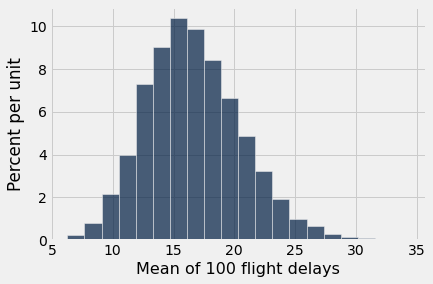

In [50]:
Table().with_column(
    'Mean of 100 flight delays', sample_means_100).hist(bins=20)

print('Population Average:', np.round(delay_mean,2))

<h4>What happens if we take 10,000 sample populations (10,000 trials), each containing info about 400 flights (sample size of 400)?</h4>

Population Average: 16.66


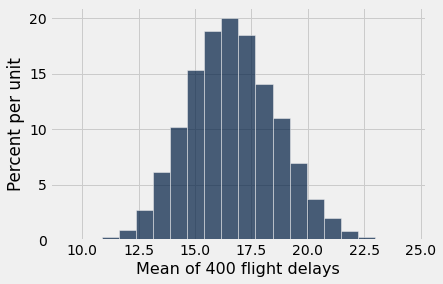

In [51]:
sample_means_400 = many_sample_means(400,10000)
Table().with_column(
    'Mean of 400 flight delays', sample_means_400).hist(bins=20)

print('Population Average:', np.round(delay_mean,2))

Population Average: 16.66


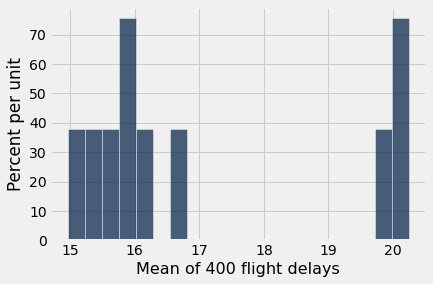

In [52]:
sample_means_400 = many_sample_means(400,10)
Table().with_column(
    'Mean of 400 flight delays', sample_means_400).hist(bins=20)

print('Population Average:', np.round(delay_mean,2))

Population Average: 16.66


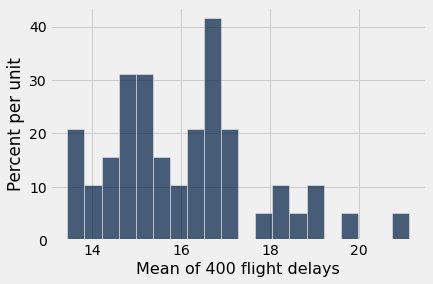

In [53]:
sample_means_400 = many_sample_means(400,50)
Table().with_column(
    'Mean of 400 flight delays', sample_means_400).hist(bins=20)

print('Population Average:', np.round(delay_mean,2))

Population Average: 16.66


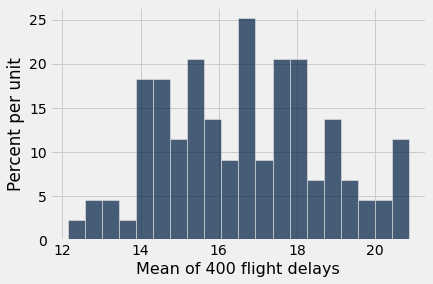

In [54]:
sample_means_400 = many_sample_means(400,100)
Table().with_column(
    'Mean of 400 flight delays', sample_means_400).hist(bins=20)

print('Population Average:', np.round(delay_mean,2))

Population Average: 16.66


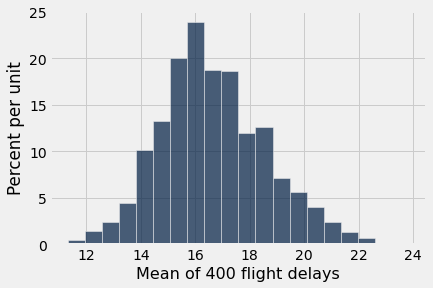

In [55]:
sample_means_400 = many_sample_means(400,1000)
Table().with_column(
    'Mean of 400 flight delays', sample_means_400).hist(bins=20)

print('Population Average:', np.round(delay_mean,2))

Population Average: 16.66


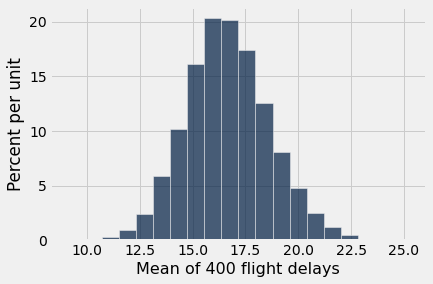

In [56]:
sample_means_400 = many_sample_means(400,10000)
Table().with_column(
    'Mean of 400 flight delays', sample_means_400).hist(bins=20)

print('Population Average:', np.round(delay_mean,2))

Population Average: 16.66


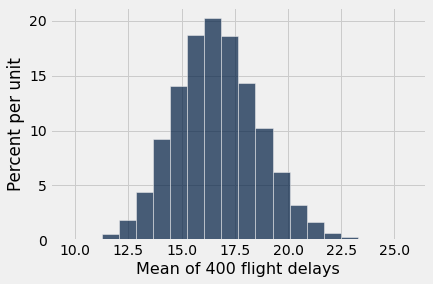

In [57]:
sample_means_400 = many_sample_means(400,50000)
Table().with_column(
    'Mean of 400 flight delays', sample_means_400).hist(bins=20)

print('Population Average:', np.round(delay_mean,2))